# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [40]:
# your code here
df.drop(['Id'], axis=1, inplace = True)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [41]:
# your code here
pct = df.isnull().sum().reset_index()
pct['percent_missing'] = pct[0] / len(df) * 100
pct.drop([0], axis=1, inplace = True)
pct = pct.rename(columns={"index": "column_name"})
pct = pct[pct['percent_missing']>20]
pct

,column_name,percent_missing
5,Alley,93.767123
56,FireplaceQu,47.260274
71,PoolQC,99.520548
72,Fence,80.753425
73,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [42]:
# your code here
df.drop(list(pct.column_name), axis=1, inplace = True)

In [164]:
df.shape

(1460, 81)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

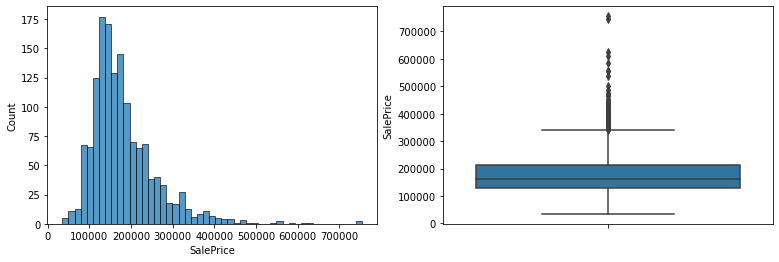

In [73]:
# your code here

fig, ax = plt.subplots(1,2, figsize=(13,4))
sns.histplot(x = 'SalePrice', data = df, ax = ax[0])
sns.boxplot(y = 'SalePrice', data = df, ax = ax[1])

>**Answer**: The SalesPrice column is skewed to the right, so it's median is going to be lower than it's mean and there are some very epensive home sales, based on the box plots all sales prices above around 350,000 are outliers

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the right. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [77]:
# your code here
df['SalePriceAdjusted'] = np.log(df['SalePrice'])

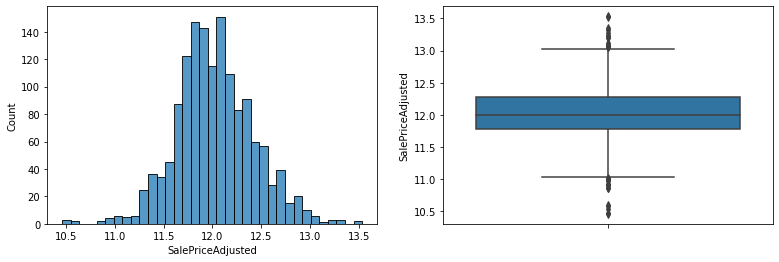

In [78]:
fig, ax = plt.subplots(1,2, figsize=(13,4))
sns.histplot(x = 'SalePriceAdjusted', data = df, ax = ax[0])
sns.boxplot(y = 'SalePriceAdjusted', data = df, ax = ax[1])

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000


In [85]:
# your code here
# add cells as needed

df[[
    'SalePriceAdjusted', 
    'YrSold',
    'GrLivArea', 
    'LotArea', 
    'GarageArea', 
    'BedroomAbvGr', 
    'KitchenAbvGr', 
    'FullBath', 
    'HalfBath', 
    'BsmtFullBath', 
    'BsmtHalfBath', 
    'YearBuilt',
    'YearRemodAdd',
    'Neighborhood',
    'TotRmsAbvGrd'
    
]]

,SalePriceAdjusted,YrSold,GrLivArea,LotArea,GarageArea,BedroomAbvGr,KitchenAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,YearBuilt,YearRemodAdd,Neighborhood,TotRmsAbvGrd
0,12.247694,2008,1710,8450,548,3,1,2,1,1,0,2003,2003,CollgCr,8
1,12.109011,2007,1262,9600,460,3,1,2,0,0,1,1976,1976,Veenker,6
2,12.317167,2008,1786,11250,608,3,1,2,1,1,0,2001,2002,CollgCr,6
3,11.849398,2006,1717,9550,642,3,1,1,0,1,0,1915,1970,Crawfor,7
4,12.429216,2008,2198,14260,836,4,1,2,1,1,0,2000,2000,NoRidge,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,2007,1647,7917,460,3,1,2,1,0,0,1999,2000,Gilbert,7
1456,12.254863,2010,2073,13175,500,3,1,2,0,1,0,1978,1988,NWAmes,7
1457,12.493130,2010,2340,9042,252,4,1,2,0,0,0,1941,2006,Crawfor,9
1458,11.864462,2010,1078,9717,240,2,1,1,0,1,0,1950,1996,NAmes,5


In [120]:
df['BathFullTot'] = df['BsmtFullBath']+df['FullBath']
df['BathHalfTot'] = df['BsmtHalfBath']+df['HalfBath']
df['BathTot'] = df['BathFullTot'] + df['BathHalfTot'] 
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']
df['RemodelledRecency'] = df['YrSold'] - df['YearRemodAdd']

### Area

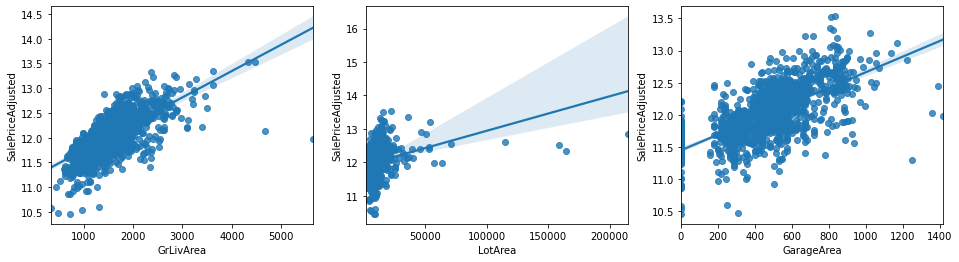

In [118]:

lst = ['GrLivArea', 'LotArea', 'GarageArea']

fig, ax = plt.subplots(ncols = len(lst), figsize=(16,4))


#sns.histplot(x = 'SalePriceAdjusted', data = df, ax = ax[0])
#sns.boxplot(y = 'SalePriceAdjusted', data = df, ax = ax[1])

for i, el in enumerate(lst):
    #plt.sca(ax[i])
    sns.regplot(
        x=el, 
        y='SalePriceAdjusted', 
        data=df, 
        fit_reg=True, 
        #hue = 'YrSold', 
        ax = ax[i]
    )
    
plt.show()

### Rooms

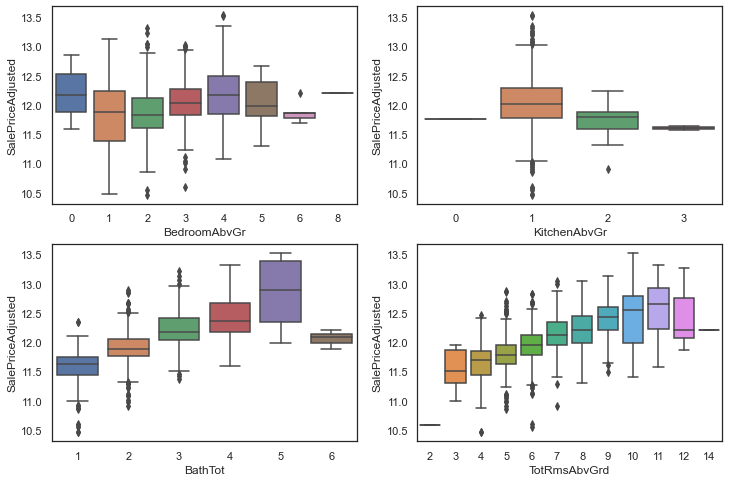

In [257]:

lst = ['BedroomAbvGr', 'KitchenAbvGr', 'BathTot', 'TotRmsAbvGrd']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,8))


#sns.histplot(x = 'SalePriceAdjusted', data = df, ax = ax[0])
#sns.boxplot(y = 'SalePriceAdjusted', data = df, ax = ax[1])

for i in range(2):
    for j in range(2):
    #plt.sca(ax[i])
        sns.boxplot(
            x=lst[i*2+j], 
            y='SalePriceAdjusted', 
            data=df, 
            #fit_reg=True, 
            #hue = 'YrSold', 
            ax = ax[i, j]
        )
    
plt.show()

### Age of property and recency of remodelling

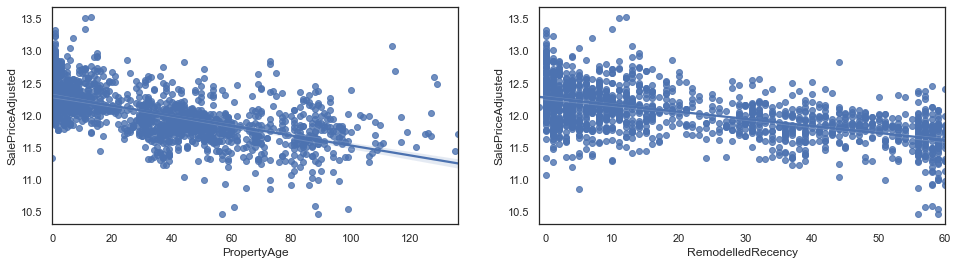

In [255]:
lst = ['PropertyAge', 'RemodelledRecency']

fig, ax = plt.subplots(ncols = len(lst), figsize=(16,4))

for i, el in enumerate(lst):
    #plt.sca(ax[i])
    sns.regplot(
        x=el, 
        y='SalePriceAdjusted', 
        data=df, 
        fit_reg=True, 
        #hue = 'YrSold', 
        ax = ax[i]
    )


### Neighbourhood 

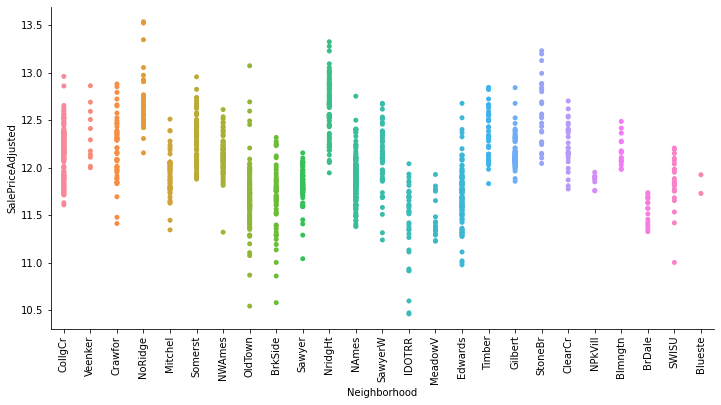

In [159]:
g = sns.catplot(
    x = 'Neighborhood', 
    y = 'SalePriceAdjusted', 
    data = df, 
    height = 5, 
    aspect = 2,
    jitter = False
)

g.set_xticklabels(rotation=90)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

Text(0.5, 1.0, 'Correlations of above 0.5 or below -0.5')

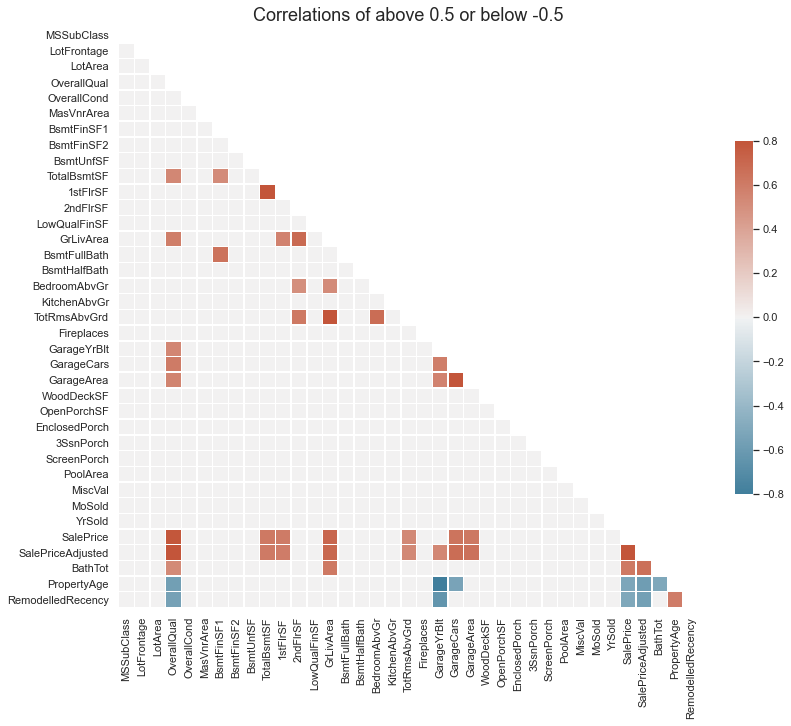

In [238]:
# your code here

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.drop(columns = ['YearBuilt', 'YearRemodAdd', 'BathFullTot', 'BathHalfTot', 'FullBath', 'HalfBath']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
cut_off = 0.5

sns.heatmap(
    corr.apply(lambda x: np.where(abs(x)>=cut_off, x, 0)), 
    mask=mask, 
    cmap=cmap, 
    vmax=.8, 
    vmin=-.8,
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5},
    #annot = True,
    #fmt=".1f",
    #annot_kws={"size": 10}
).set_title(f'Correlations of above {cut_off} or below -{cut_off}', fontsize=18)

In [253]:
corr['SPadjAbs'] = abs(corr['SalePriceAdjusted'])
cols = corr[corr['SPadjAbs'] >= 0.5].index
corr.sort_values(by = 'SPadjAbs', ascending = False)[corr['SPadjAbs'] >= 0.5][cols]

<ipython-input-253-dd58e90b2be3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr.sort_values(by = 'SPadjAbs', ascending = False)[corr['SPadjAbs'] >= 0.5][cols]


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice,SalePriceAdjusted,BathTot,PropertyAge,RemodelledRecency
SalePriceAdjusted,0.817184,0.612134,0.596981,0.700927,0.534422,0.541073,0.680625,0.650888,0.948374,1.000000,0.657798,-0.587290,-0.568136
SalePrice,0.790982,0.613581,0.605852,0.708624,0.533723,0.486362,0.640409,0.623431,1.000000,0.948374,0.613005,-0.523350,-0.509079
OverallQual,1.000000,0.537808,0.476224,0.593007,0.427452,0.547766,0.600671,0.562022,0.790982,0.817184,0.529906,-0.572629,-0.552570
GrLivArea,0.593007,0.454868,0.566024,1.000000,0.825489,0.231197,0.467247,0.468997,0.708624,0.700927,0.617494,-0.200302,-0.289805
GarageCars,0.600671,0.434585,0.439317,0.467247,0.362289,0.588920,1.000000,0.882475,0.640409,0.680625,0.468671,-0.538727,-0.423236
BathTot,0.529906,0.339473,0.300033,0.617494,0.482310,0.452934,0.468671,0.425791,0.613005,0.657798,1.000000,-0.506340,-0.425641
GarageArea,0.562022,0.486665,0.489782,0.468997,0.337822,0.564567,0.882475,1.000000,0.623431,0.650888,0.425791,-0.479408,-0.373447
TotalBsmtSF,0.537808,1.000000,0.819530,0.454868,0.285573,0.322445,0.434585,0.486665,0.613581,0.612134,0.339473,-0.391498,-0.292096
1stFlrSF,0.476224,0.819530,1.000000,0.566024,0.409516,0.233449,0.439317,0.489782,0.605852,0.596981,0.300033,-0.282143,-0.241310
PropertyAge,-0.572629,-0.391498,-0.282143,-0.200302,-0.096955,-0.824615,-0.538727,-0.479408,-0.523350,-0.587290,-0.506340,1.000000,0.594195


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

>**Answer**: Let us select select variables that have correlations with SalePriceAdjusted of above 0.5 or below -0.5. The cut-off value of 0.6 is selected arbitrary and indicated moderate to strong correlations.
>
>Based on these additional variables of inerest are:
>
> - **OverallQual**: Overall material and finish quality
> - **TotalBsmtSF**: Total square feet of basement area
> - **GrLivArea**: Above grade (ground) living area square feet
> - **1stFlrSF**: First Floor square feet
> - **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
> - **GarageYrBlt**: Year garage was built 
> - **GarageCars**: Size of garage in car capacity
> - **GarageArea**: Size of garage in square feet
> - **BathTot**: total number of bathrooms
> - **PropertyAge**: age of the property at the year of sale
> - **RemodelledRecency**: years since last remodelling at the year of sale
>
> It also needs to be taken into account that there is strong correlation between some of the variables listed above, meaning that some of them might be reduntant. For example, TotRmsAbvGrd is highly correlated with GrLivArea, or GrLivArea is also highly correlated with 1stFlrSF, etc.

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

## ANSWER:

>**House prices sold between 2006 and 2010 are primarily determined by overall quality of a house, living area, number of cars that the garage can fit, number of bathrooms and basement size. Good neighbourhood will help too**

> **Overall material and finish quality** has the highest importance of all listed factors based on a correlation. During the years 2006-2010 it was consistently a high 'effect' factor. In some Neighbourhoods this relationship is weaker than in others over the years. In some areas this can be explained by consistent quality of properties. 
>
> **Living area** House sale price is positively correlated consistently across all neighbourhoods and across all years. This is a logical expectation and can be explained due to underlying costs of building a bigger house
>
> **Size of garage in car capacity** is a factor number three in terms of individual effect on adjusted sale price. However, it is worth noting that the area of the garage will play almost equale role - as expected these two factors are going to be highly correlated. Souse prices will consistently increase till the 4 cars mark - and that is across years and almost all neihbourhoods. It seems that a four car properties have other drivers in play, that need to be investigated more - and only 5 properties like that were sold between 2006 and 2010!
>
>**Number of bathrooms** will also positive affect sale price of a property - the relationship is positive across all years and neighnpurhoods for all bathroom configurations except 6 bathrooms. Thos are however very rare properties and need to be investigated separately
>
>**Total square feet of basement area**: in general across all years the houses with larger basements sold for higher prices. There were two neighbourhoos, however, where bigger basements were not as importnat and did not correspond with higher sale price. In one, that was simply a function of too few sales and in another, additonal investigation is required.

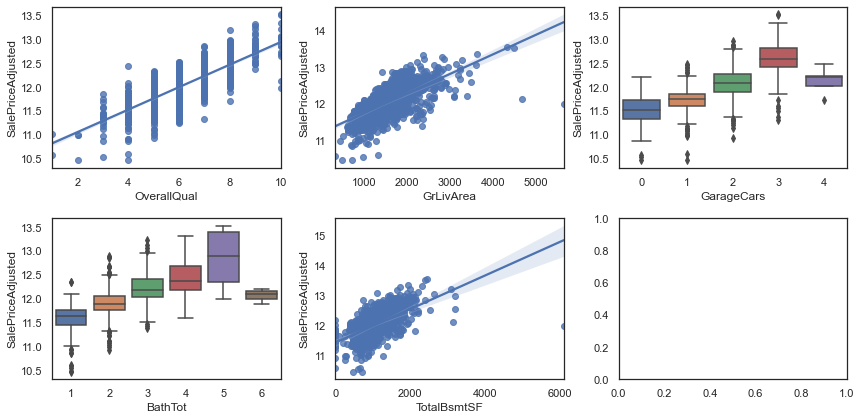

In [365]:
nrows = 1
ncols = 3

fig, ax = plt.subplots(nrows = 2, ncols = ncols, figsize=(12,6))
sns.regplot(x = "OverallQual", y = "SalePriceAdjusted", data=df, ax = ax[0,0])
sns.regplot(x = "GrLivArea", y = "SalePriceAdjusted", data=df, ax = ax[0,1])
sns.boxplot(x = 'GarageCars', y = "SalePriceAdjusted", data = df, ax = ax[0,2])
sns.boxplot(x = 'BathTot', y = "SalePriceAdjusted", data = df, ax = ax[1,0])
sns.regplot(x = 'TotalBsmtSF', y = "SalePriceAdjusted", data = df, ax = ax[1,1])

plt.tight_layout()
plt.show()

## Detailed charts 

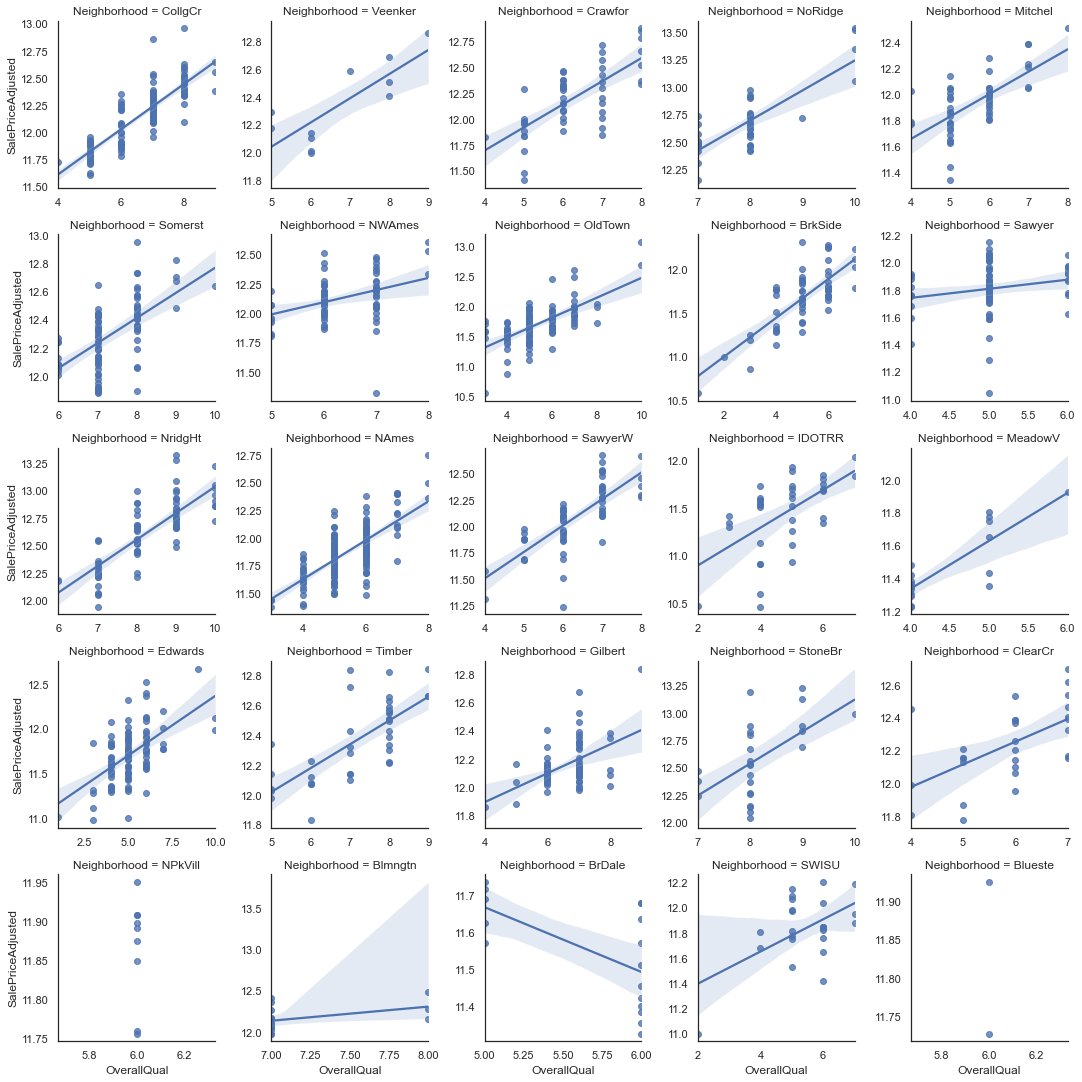

In [288]:
g = sns.lmplot(
    x="OverallQual", 
    y="SalePriceAdjusted", 
    data=df, 
    col='Neighborhood', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)

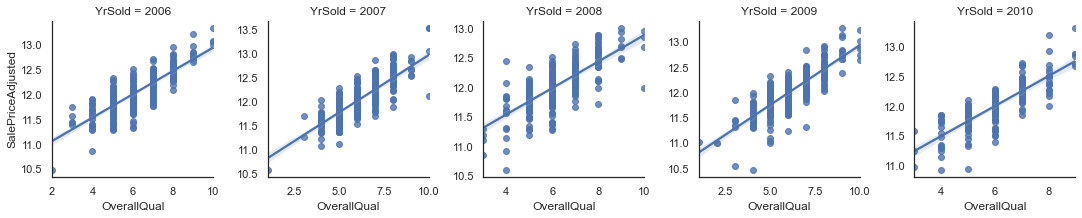

In [290]:
g = sns.lmplot(
    x="OverallQual", 
    y="SalePriceAdjusted", 
    data=df, 
    col='YrSold', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)

Price is positively correlated consistently across all neighbourhoods. It is easily exmplained due to underlying costs of buuilding a bigger house


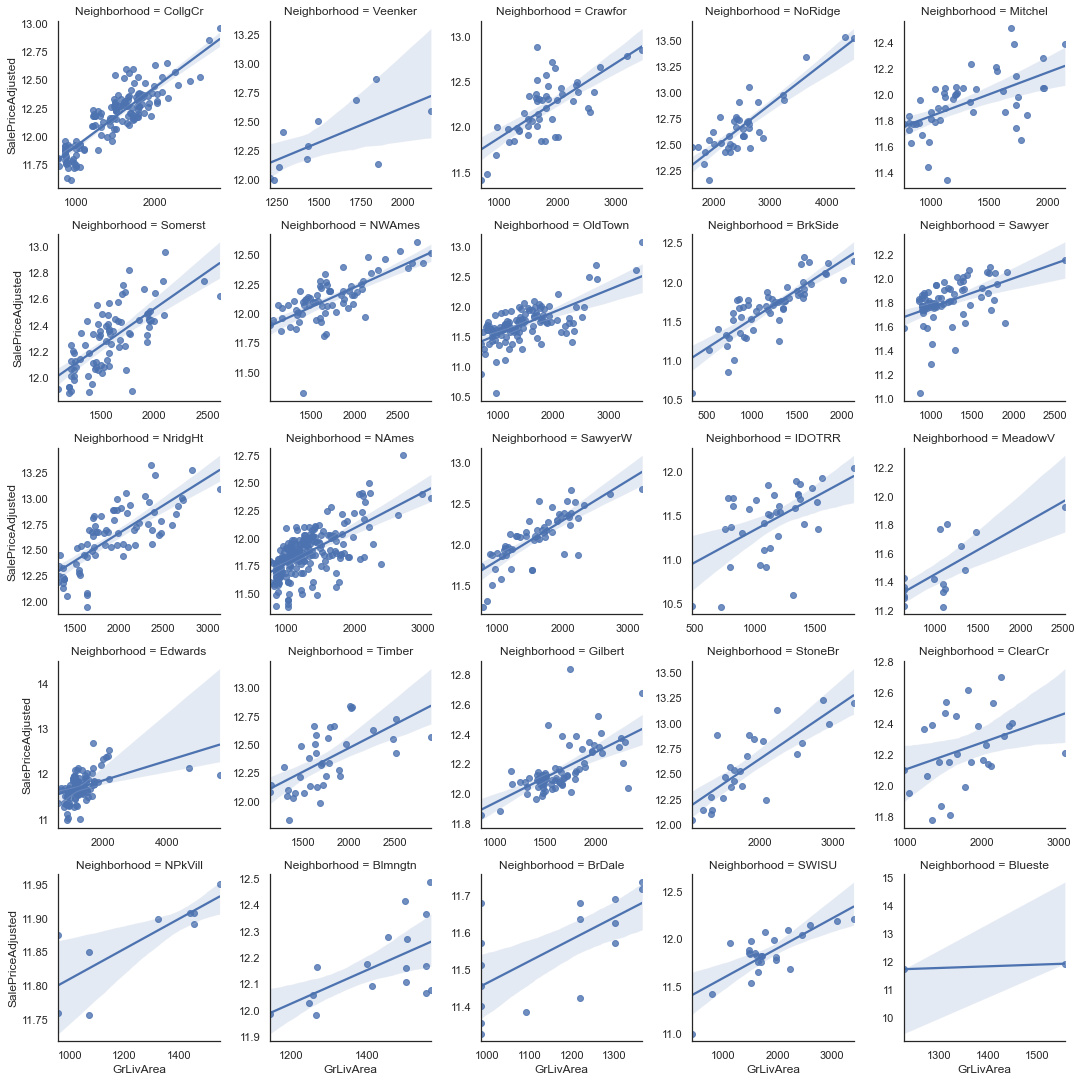

In [286]:
g = sns.lmplot(
    x="GrLivArea", 
    y="SalePriceAdjusted", 
    data=df, 
    col='Neighborhood', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)

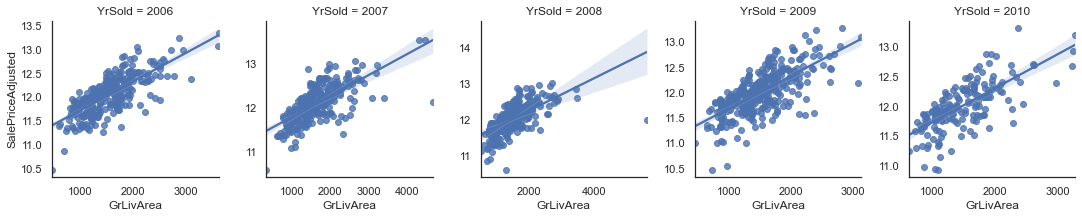

In [287]:
g = sns.lmplot(
    x="GrLivArea", 
    y="SalePriceAdjusted", 
    data=df, 
    col='YrSold', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)

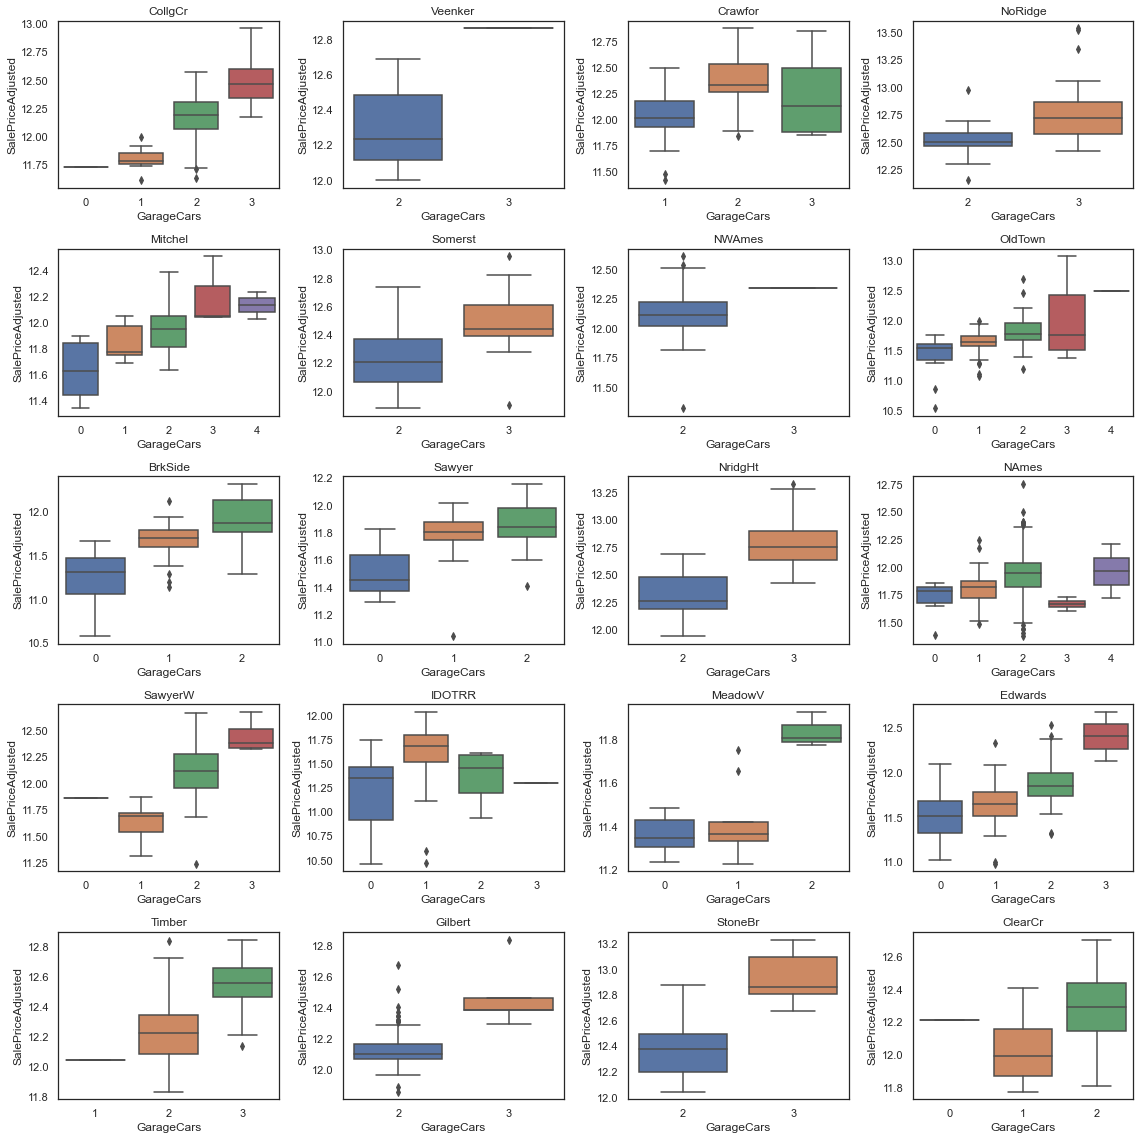

In [323]:
lst = df['Neighborhood'].unique()

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot( 
         x = 'GarageCars',
         y ="SalePriceAdjusted", 
         data=df[df['Neighborhood'] == lst[i]], 
         ax = ax
     ).set_title(lst[i])

plt.tight_layout()
plt.show()


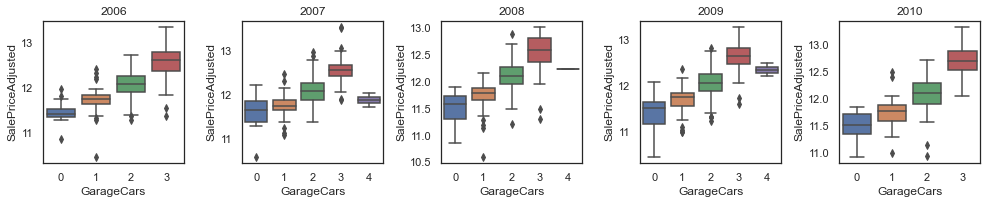

In [334]:
lst = sorted(df['YrSold'].unique())

nrows = 1
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(14,3))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot( 
         x = 'GarageCars',
         y = "SalePriceAdjusted", 
         data=df[df['YrSold'] == lst[i]], 
         ax = ax
     ).set_title(lst[i])

plt.tight_layout()
plt.show()


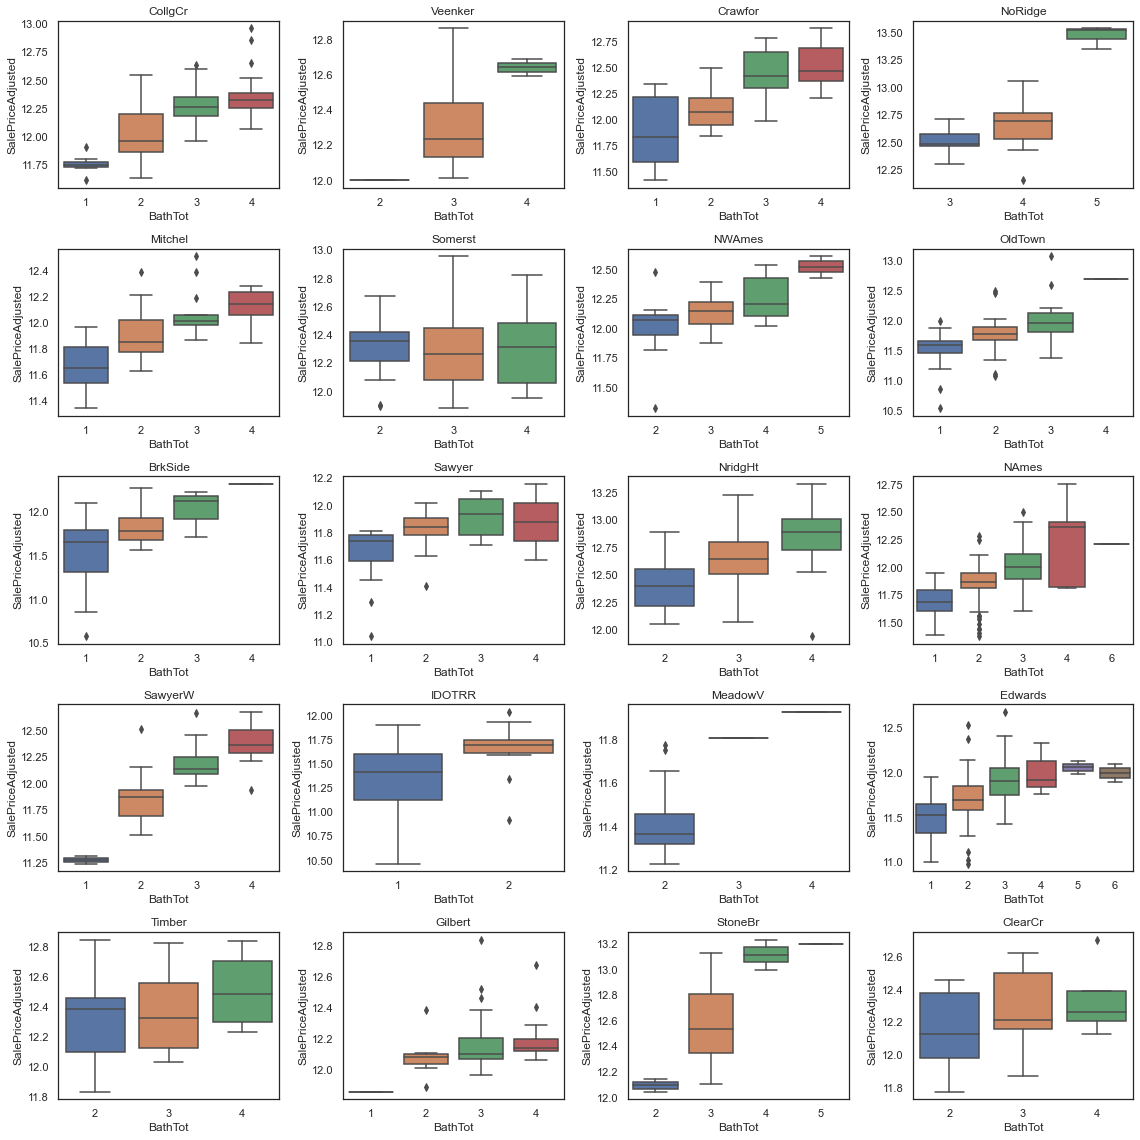

In [371]:
lst = df['Neighborhood'].unique()

nrows = 5
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot( 
         x = 'BathTot',
         y ="SalePriceAdjusted", 
         data=df[df['Neighborhood'] == lst[i]], 
         ax = ax
     ).set_title(lst[i])

plt.tight_layout()
plt.show()

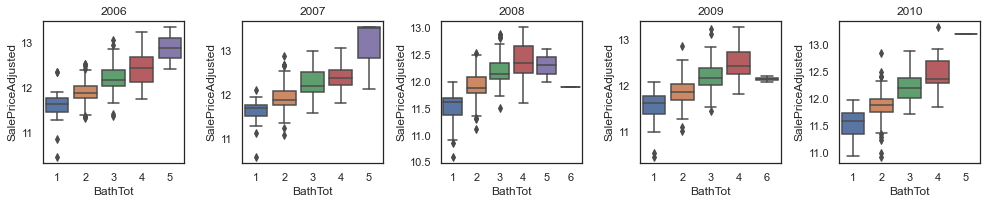

In [372]:
lst = sorted(df['YrSold'].unique())

nrows = 1
ncols = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(14,3))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot( 
         x = 'BathTot',
         y = "SalePriceAdjusted", 
         data=df[df['YrSold'] == lst[i]], 
         ax = ax
     ).set_title(lst[i])

plt.tight_layout()
plt.show()


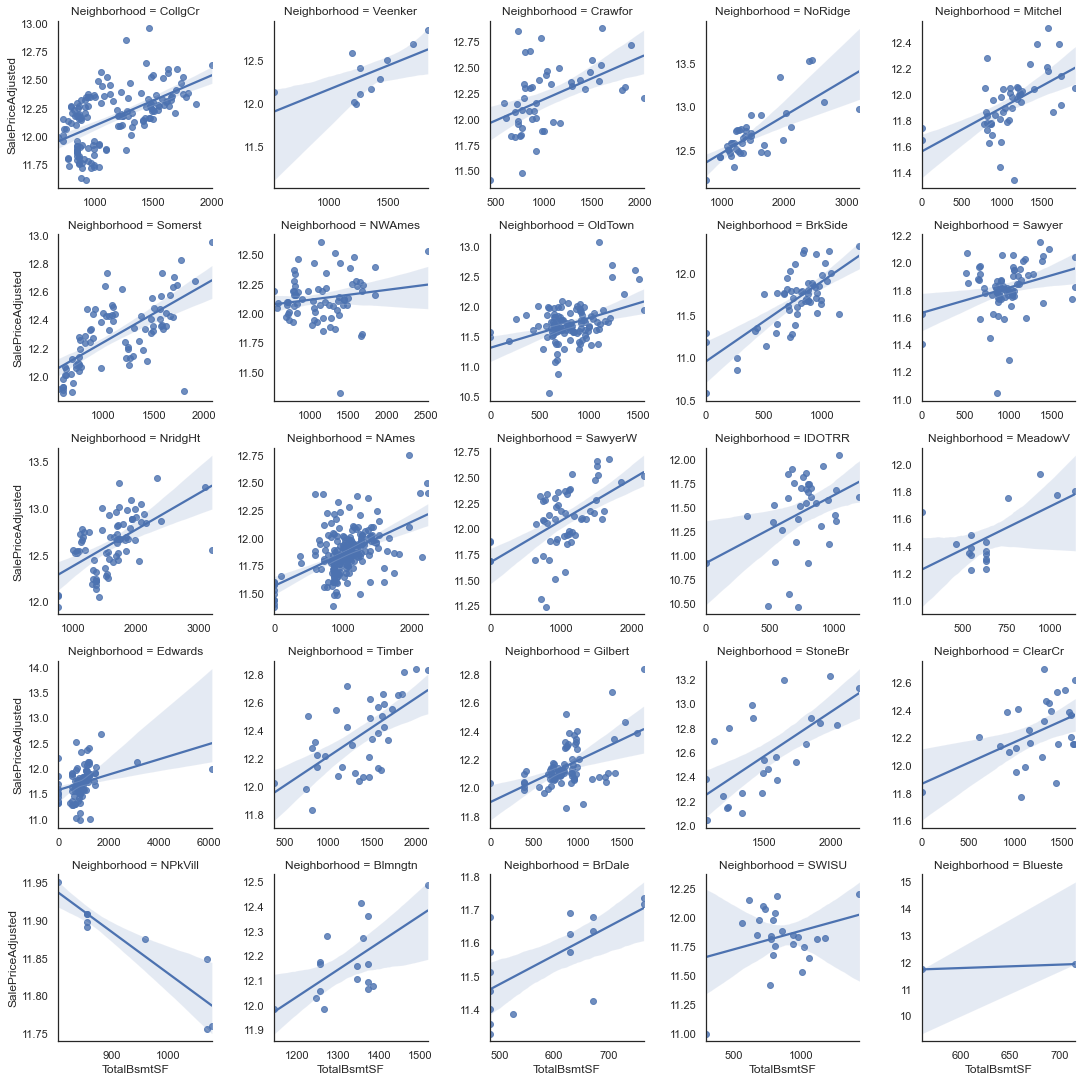

In [373]:
g = sns.lmplot(
    x="TotalBsmtSF", 
    y="SalePriceAdjusted", 
    data=df, 
    col='Neighborhood', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)

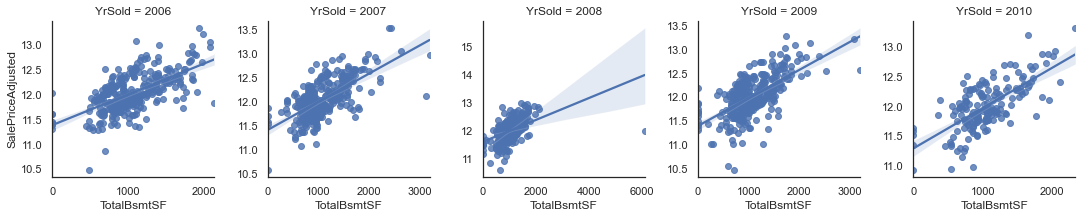

In [374]:
g = sns.lmplot(
    x="TotalBsmtSF", 
    y="SalePriceAdjusted", 
    data=df, 
    col='YrSold', 
    sharex=False, 
    sharey=False, 
    height=3, 
    col_wrap=5
)